In this notebook i will build a model which predicts the close_value and 'DateDiff' for the dataset.

I have used Random Forests and Gradient Boosting, Regression , SVR for making the predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('sales.csv', index_col=0)
df.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Ordered_Product,Ordered_Agent
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,1,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,2,21
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,1,MG Special,45,2016-01-04,2016-11-02,303,6,20
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,0,MG Special,1054,2016-01-06,2016-12-07,336,6,2
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,0,MG Advanced,517,2016-01-06,2016-09-18,256,1,27
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,1,MG Advanced,3180,2016-01-07,2016-01-31,24,1,0


In [146]:
df.shape

(6711, 13)

In [38]:
msk = np.random.rand(len(df)) < 0.70

train = df[msk]
test = df[~msk]

In [39]:
X = df[['Deal_Stage','DateDiff', 'Ordered_Product','Ordered_Agent']]
y = df['Close_Value']

In [40]:
X.head()

,Deal_Stage,DateDiff,Ordered_Product,Ordered_Agent
0,1,141,2,21
1,1,303,6,20
2,0,336,6,2
4,0,256,1,27
5,1,24,1,0


In [41]:
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [42]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,shuffle=True)
X_train.shape, X_test.shape

((4697, 4), (2014, 4))

In [43]:
scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [183]:
X_train.columns

Index(['Deal_Stage', 'Close_Value', 'Ordered_Product', 'Ordered_Agent'], dtype='object')

In [11]:
# Algorithm 1 Ridge Regression

In [44]:
from sklearn.linear_model import Ridge, Lasso
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
parameters = {'alpha':[1, 10]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train_scaled,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [46]:
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train_scaled,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [47]:
y_pred = best_model.predict(X_test_scaled)

In [48]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2181.2680381450295


In [49]:
parameters = {'alpha':[1, 10, 5,2,3]}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Lasso_reg.fit(X_train_scaled,y_train)

# best estimator
print(Lasso_reg.best_estimator_)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [50]:
best_model = Lasso_reg.best_estimator_
best_model.fit(X_train_scaled,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [51]:
y_pred = best_model.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2181.1148567076916


In [26]:
# Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf1 = RandomForestRegressor()

n_estimators = [200, 300, 500, 400, 100]
max_depth = [4,6,5, 7,8]
min_samples_split = [6,8,9,7]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, scoring='neg_mean_squared_error',
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


In [55]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: -1063238.192297 using {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 100}


In [56]:
rf_best = RandomForestRegressor(max_depth= 7, min_samples_split= 6, n_estimators= 100, min_samples_leaf=3, max_features='sqrt')

In [57]:
rf_best.fit(X_train_scaled, y_train)
y_pred = rf_best.predict(X_test_scaled)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy of our model is: ', r2_score(y_test, y_pred))

1415.2333785310432
Accuracy of our model is:  0.6140729806850534


In [33]:
from sklearn.neighbors import KNeighborsRegressor

Minimum error:- 1419.0300006958541 at K = 1


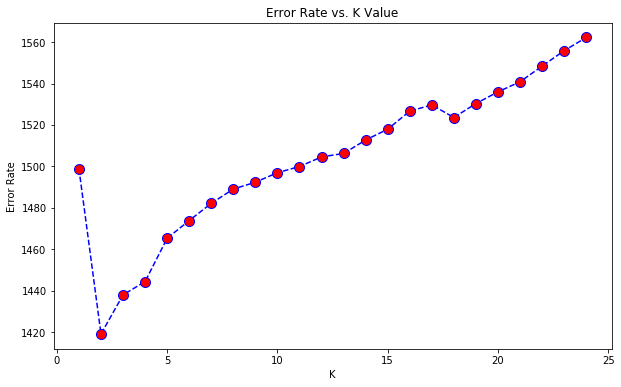

In [61]:
Ks = 25
error_rate = []
# Will take some time
for i in range(1,25):
    #print(i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.sqrt(mean_squared_error(y_test, pred_i)))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [53]:
X_train_scaled.shape

(4697, 4)

In [62]:
from sklearn.svm import SVR 

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [ 5, 10, 100, 50, 75], 
            'gamma': [ 0.1, 0.01, 0.001], 
            'kernel': ['rbf', 'poly']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, cv=3, scoring='neg_mean_squared_error') 

# fitting the model for grid search 
grid.fit(X_train_scaled, y_train) 

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=5, gamma=0.1, kernel=rbf, score=-5895955.135, total=   0.6s
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ... C=5, gamma=0.1, kernel=rbf, score=-5488419.138, total=   0.6s
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ... C=5, gamma=0.1, kernel=rbf, score=-7664309.808, total=   0.5s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] .. C=5, gamma=0.1, kernel=poly, score=-5805819.320, total=   0.3s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] .. C=5, gamma=0.1, kernel=poly, score=-5369294.952, total=   0.4s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] .. C=5, gamma=0.1, kernel=poly, score=-7495400.362, total=   0.3s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] .. C=5, gamma=0.01, kernel=rbf, score=-5779254.008, total=   0.8s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] .. C=5, gamma=0.01, kernel=rbf, score=-5355824.096, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] .. C=5, gamma=0.01, kernel=rbf, score=-7505502.582, total=   0.6s
[CV] C=5, gamma=0.01, kernel=poly ....................................
[CV] .

[CV] . C=50, gamma=0.01, kernel=rbf, score=-5888324.374, total=   0.8s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] . C=50, gamma=0.01, kernel=rbf, score=-5481532.514, total=   0.7s
[CV] C=50, gamma=0.01, kernel=rbf ....................................
[CV] . C=50, gamma=0.01, kernel=rbf, score=-7641314.918, total=   0.7s
[CV] C=50, gamma=0.01, kernel=poly ...................................
[CV]  C=50, gamma=0.01, kernel=poly, score=-5810111.061, total=   0.3s
[CV] C=50, gamma=0.01, kernel=poly ...................................
[CV]  C=50, gamma=0.01, kernel=poly, score=-5370068.112, total=   0.4s
[CV] C=50, gamma=0.01, kernel=poly ...................................
[CV]  C=50, gamma=0.01, kernel=poly, score=-7508013.160, total=   0.6s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  C=50, gamma=0.001, kernel=rbf, score=-5778530.801, total=   0.5s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   44.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 100, 50, 75], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [63]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [64]:
svr = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

In [65]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy of our model is: ', r2_score(y_test, y_pred))

2367.2980970703834
Accuracy of our model is:  -0.07982892691158527


In [66]:
#GBM

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
parameters = {'n_estimators': [5,10],
              'loss':['huber', 'deviance'],
              'criterion': ['mse', "friedman_mse"],
              'max_depth': [5,10,3], 
              "max_features":["log2","sqrt"],
              'min_samples_split': [2,5,3],
              'min_samples_leaf': [1,3,5]
             }


clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=3, n_jobs=-1, verbose=1)

In [77]:
clf.fit(X_train_scaled, y_train) 
print(clf.score(X_train_scaled, y_train))
print(clf.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   50.7s finished


0.6385658595501832
{'criterion': 'mse', 'loss': 'huber', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}


In [78]:
clf

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [72]:
gbm = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100)
gbm.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
y_pred = gbm.predict(X_test_scaled)

In [75]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy of our model is: ', r2_score(y_test, y_pred))

1017.0751010077884
Accuracy of our model is:  0.8006780605374886


In [79]:
## going with GBM regressor

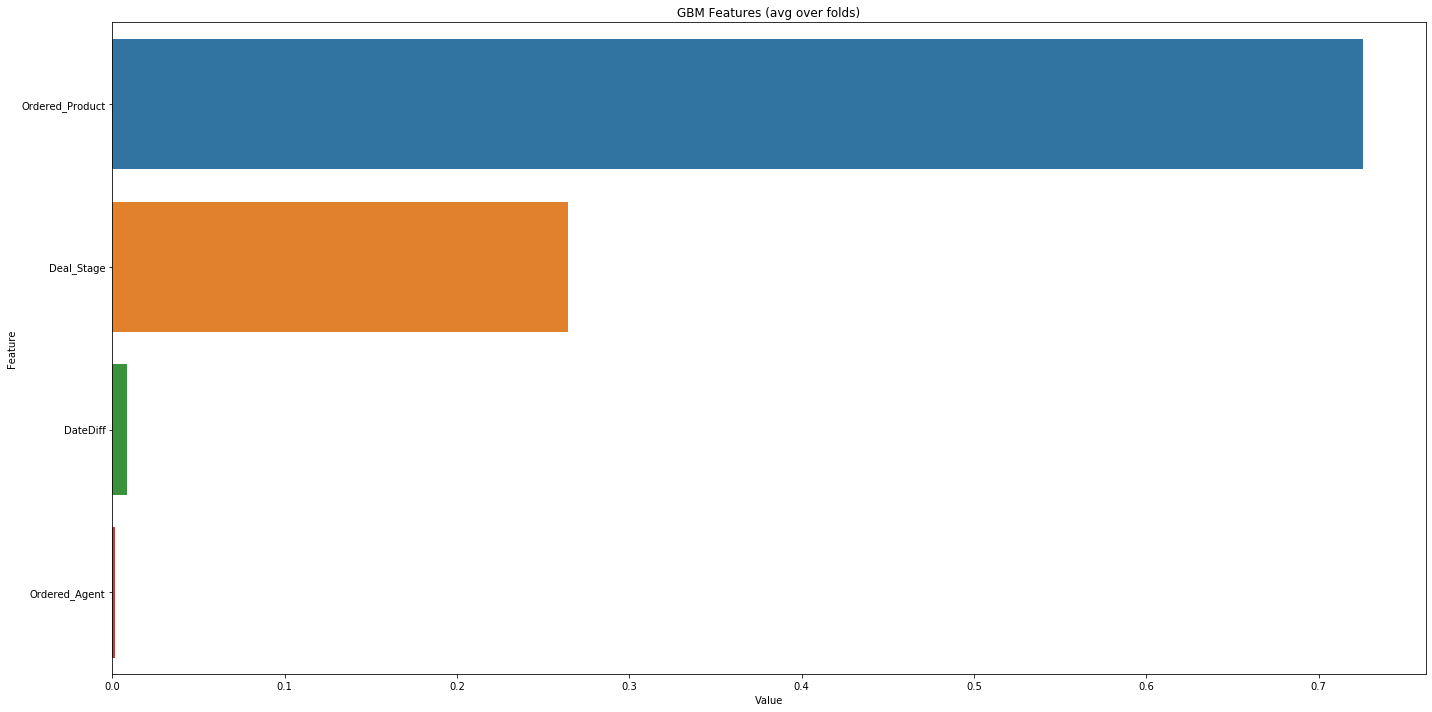

In [81]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [178]:
import pickle

In [180]:
pickle.dump(gbm, open('gbm_model', 'wb'))
pickle.dump(scaler, open('scaler_RS', 'wb'))

In [83]:
## going with GBM model for predictions

In [149]:
test=df1[['Deal_Stage','DateDiff', 'Ordered_Product','Ordered_Agent','Close_Value']]

In [150]:
test.head()

,Deal_Stage,DateDiff,Ordered_Product,Ordered_Agent,Close_Value
0,1,141,2,21,1255
1,1,303,6,20,45
2,0,336,6,2,1054
4,0,256,1,27,517
5,1,24,1,0,3180


In [151]:
test1 = scaler.transform(test[['Deal_Stage','DateDiff', 'Ordered_Product','Ordered_Agent']])

In [152]:
close_preds = gbm.predict(test1)

In [153]:
df1['Close_Value_predicted'] = close_preds

In [154]:
df1.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Ordered_Product,Ordered_Agent,Close_Value_predicted
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,1,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,2,21,1214.940722
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,1,MG Special,45,2016-01-04,2016-11-02,303,6,20,117.016476
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,0,MG Special,1054,2016-01-06,2016-12-07,336,6,2,1058.400356
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,0,MG Advanced,517,2016-01-06,2016-09-18,256,1,27,1427.541335
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,1,MG Advanced,3180,2016-01-07,2016-01-31,24,1,0,3377.844653


In [92]:
# Now predicting dealdiff

In [93]:
X = df[['Deal_Stage','Close_Value', 'Ordered_Product','Ordered_Agent']]
y = df['DateDiff']

In [94]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,shuffle=True)
X_train.shape, X_test.shape

((4697, 4), (2014, 4))

In [95]:
scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [144]:
parameters = {'n_estimators': [5,10,7,15],
              'max_depth': [5,10,3,8], 
              'min_samples_split': [2,5,3,10],
              'min_samples_leaf': [1,3,5]
             }


clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=3, n_jobs=-1, verbose=1,scoring='r2' )

In [145]:
clf.fit(X_train_scaled, y_train) 
print(clf.score(X_train_scaled, y_train))
print(clf.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s


0.007634735282956662
{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 5}


[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    7.2s finished


In [98]:
clf

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [104]:
gbm1 = GradientBoostingRegressor(max_depth=3,min_samples_leaf=3,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=5,max_features='sqrt')

In [105]:
gbm1.fit(X_train_scaled, y_train)
y_pred = gbm1.predict(X_test_scaled)

In [107]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

244.04925481211785


In [140]:
rf1 = RandomForestRegressor()

n_estimators = [200, 300, 100]
max_depth = [8, 7, 10, 15]
min_samples_split = [6,8,9,7]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, scoring='r2',
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   48.7s finished


In [141]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: -0.018195 using {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 300}


In [142]:
rf_best = RandomForestRegressor(max_depth= 10, min_samples_split= 6, n_estimators= 100, min_samples_leaf=3, max_features='sqrt')

In [143]:
rf_best.fit(X_train_scaled, y_train)
y_pred = rf_best.predict(X_test_scaled)

print(np.sqrt(mean_squared_error(y_test, y_pred)))


247.3184664736158


In [114]:
#Going with Random Forest for predicting DateDiff

### Results

### 1. I will be using the Gradient boosting Regressor for predicting future close_value's for the dataset.

#### The GBM model had the following scores:

RMSE - 1017.0751010077884

Accuracy of our model is:  0.8006780605374886